<a href="https://colab.research.google.com/github/tarangga/Mathematics/blob/main/Analysis_of_Covid_19_in_NTB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
covid_mingguan = pd.read_csv('/content/COVID NTB - Data per minggu (2).csv').drop(columns=['index'])
for col in covid_mingguan.columns:
  covid_mingguan[col] = covid_mingguan[col].astype(int)

pertumbuhan_mingguan = (covid_mingguan[:-1] - covid_mingguan[1:].reset_index()).drop(columns=['index'])
minggu_0 = covid_mingguan.iloc[0]

**PARAMETER**

In [ ]:
population = 5125622
exposed = minggu_0['suspek_jumlah'] # 10105
infective = minggu_0['konfirmasi_jumlah'] # 2315
quarantine = minggu_0['konfirmasi_isolasi'] # 748
recovery = minggu_0['konfirmasi_sembuh'] # 1439
suspect = population - exposed - infective - recovery 
delta = 0.0
miu = (pertumbuhan_mingguan['konfirmasi_meninggal']/covid_mingguan['konfirmasi_isolasi'][1:].reset_index(drop=True)).sum()/pertumbuhan_mingguan.shape[0] # 0.014946448917251071 -- rata-rata mingguan per minggu

alpha = (pertumbuhan_mingguan['konfirmasi_jumlah']/population).sum()/pertumbuhan_mingguan.shape[0] # 2.768e-05 -- transmisi penyebaran per minggu
beta = (pertumbuhan_mingguan['konfirmasi_jumlah']/(covid_mingguan['suspek_probable_jumlah'] + covid_mingguan['suspek_isolasi'])[1:].reset_index(drop=True)).sum()/pertumbuhan_mingguan.shape[0] # 0.2538697624457402
theta = 1 # -26.5
p = 1/14 # waktu karantina 14 hari
rho = (pertumbuhan_mingguan['konfirmasi_sembuh']/covid_mingguan['konfirmasi_isolasi'][1:].reset_index(drop=True)).sum()/pertumbuhan_mingguan.shape[0] # 0.2824015899992167 rata rata sembuh per minggu


In [ ]:
suspect = population - exposed - infective - recovery 
rho

0.2824015899992167

**PERSAMAANNYA MULAI DARI SINI**

In [ ]:
d = 0.0001
index = np.arange(start = 0, stop = 100, step = d)

def predict_suspect(t):
  change = delta - alpha*(S[-1]/population)*I[-1] - miu*S[-1]    
  return change*d + S[-1]

def predict_exposed(t):
  change = alpha*(S[-2]/population)*(I[-1]) - beta*p*E[-1] - miu*E[-1]
  return change*d + E[-1]

def predict_infective(t):
  change = beta*p*E[-2] - theta*I[-1] - miu*I[-1]
  return change*d + I[-1]

def predict_qurantine(t):
  change = theta*I[-2] - rho*Q[-1] - miu*Q[-1]
  return change*d + Q[-1]

def predict_recovery(t):
  change = rho*Q[-2] 
  return change*d + R[-1]



In [ ]:
S = [suspect]
E = [exposed]
I = [infective]
Q = [quarantine]
R = [recovery]

for i in index[1:]:
  S.append(predict_suspect(i))
  E.append(predict_exposed(i))
  I.append(predict_infective(i))
  Q.append(predict_qurantine(i))
  R.append(predict_recovery(i))


prediction = pd.DataFrame()
prediction['index'] = index
prediction.set_index('index')
prediction['S'] = S
prediction['E'] = E
prediction['I'] = I
prediction['Q'] = Q
prediction['R'] = R

In [ ]:
week_prediction = prediction.iloc[[int(i/d) for i in range(100)]].rename({'index' : 'week'})
pd.set_option('display.float_format', '{:.2f}'.format)
for col in week_prediction.columns:
  week_prediction[col] = week_prediction[col].astype(int)
week_prediction.rename(columns= {'index' : 'week'})

,week,S,E,I,Q,R
0,0,5106868,12048,3699,483,3007
10000,1,5031105,11656,1475,2390,3477
20000,2,4956467,11276,664,2626,4205
30000,3,4882937,10909,366,2370,4916
40000,4,4810497,10554,254,2019,5536
...,...,...,...,...,...,...
950000,95,1234508,520,9,36,12796
960000,96,1216193,503,9,35,12806
970000,97,1198151,486,8,34,12816
980000,98,1180376,470,8,32,12826


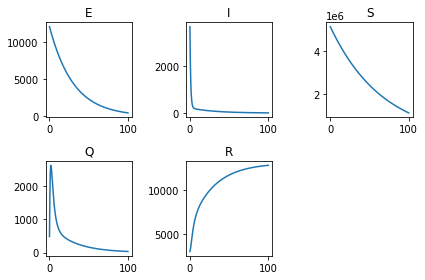

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3)
ax[0][0].plot(index, prediction['E'])
ax[0][0].set_title('E')
ax[0][1].plot(index, prediction['I'] )
ax[0][1].set_title('I')
ax[0][2].plot(index, prediction['S'] )
ax[0][2].set_title('S')
ax[1][0].plot(index, prediction['Q'] )
ax[1][0].set_title('Q')
ax[1][1].plot(index, prediction['R'] )
ax[1][1].set_title('R')
ax[1][2].axis('off')
fig.tight_layout()
plt.show()


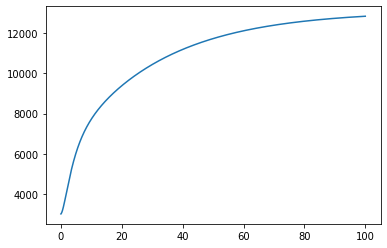

In [ ]:
plt.plot(index, prediction['R'])
plt.show()